In [1]:
!nvidia-smi

Mon Jun  3 06:28:37 2024       
+---------------------------------------------------------------------------------------+
| NVIDIA-SMI 535.104.05             Driver Version: 535.104.05   CUDA Version: 12.2     |
|-----------------------------------------+----------------------+----------------------+
| GPU  Name                 Persistence-M | Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |         Memory-Usage | GPU-Util  Compute M. |
|                                         |                      |               MIG M. |
|=========================================+======================+======================|
|   0  Tesla T4                       Off | 00000000:00:04.0 Off |                    0 |
| N/A   65C    P8              11W /  70W |      0MiB / 15360MiB |      0%      Default |
|                                         |                      |                  N/A |
+-----------------------------------------+----------------------+--

In [2]:

import os
HOME = os.getcwd()
print(HOME)


/content


In [4]:

!pip install ultralytics==8.0.196
from IPython import display
display.clear_output()
import ultralytics
ultralytics.checks()

Ultralytics YOLOv8.0.196 🚀 Python-3.10.12 torch-2.3.0+cu121 CUDA:0 (Tesla T4, 15102MiB)
Setup complete ✅ (2 CPUs, 12.7 GB RAM, 30.0/78.2 GB disk)


In [6]:

from ultralytics import YOLO
from IPython.display import display, Image

In [7]:
!mkdir {HOME}/datasets
%cd {HOME}/datasets
!pip install roboflow

from roboflow import Roboflow
rf = Roboflow(api_key="ONRrGJFVC9GgYdOf6Nr1")
project = rf.workspace("chicken-detection-e7acb").project("chicken-detection-gkoje")
version = project.version(3)
dataset = version.download("yolov8")

/content/datasets
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 75.5/75.5 kB 2.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 158.3/158.3 kB 7.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 178.7/178.7 kB 7.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 58.8/58.8 kB 9.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.1/49.1 MB 16.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 54.5/54.5 kB 8.8 MB/s eta 0:00:00
  Attempting uninstall: opencv-python-headless
    Found existing installation: opencv-python-headless 4.9.0.80
    Uninstalling opencv-python-headless-4.9.0.80:
      Successfully uninstalled opencv-python-headless-4.9.0.80
  Attempting uninstall: idna
    Found existing installation: idna 3.7
    Uninstalling idna-3.7:
      Successfully uninstalled idna-3.7
  Attempting uninstall: cycler
    Found existing installation: cycler 0.12.1
    Uninstalling cycler-0.12.1:
      Successfully unins

loading Roboflow workspace...
loading Roboflow project...



Extracting Dataset Version Zip to Chicken-Detection-3 in yolov8:: 100%|██████████| 1598/1598 [00:00<00:00, 7812.41it/s]


In [8]:
%cd {HOME}
!yolo task=detect mode=train model=yolov8s.pt data={dataset.location}/data.yaml epochs=25 imgsz=800 plots=True

/content
100% 21.5M/21.5M [00:00<00:00, 211MB/s]
New https://pypi.org/project/ultralytics/8.2.28 available 😃 Update with 'pip install -U ultralytics'
Ultralytics YOLOv8.0.196 🚀 Python-3.10.12 torch-2.3.0+cu121 CUDA:0 (Tesla T4, 15102MiB)
engine/trainer: task=detect, mode=train, model=yolov8s.pt, data=/content/datasets/Chicken-Detection-3/data.yaml, epochs=25, patience=50, batch=16, imgsz=800, save=True, save_period=-1, cache=False, device=None, workers=8, project=None, name=None, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, show=False, save_txt=False, save_conf=False, save_crop=False, show_labels=True, show_conf=True, vid_stride=1, str

In [12]:
!ls {HOME}/runs/detect/train/

args.yaml					    R_curve.png		val_batch0_labels.jpg
confusion_matrix_normalized.png			    results.csv		val_batch0_pred.jpg
confusion_matrix.png				    results.png		val_batch1_labels.jpg
events.out.tfevents.1717396498.05a9bf6ced25.2075.0  train_batch0.jpg	val_batch1_pred.jpg
F1_curve.png					    train_batch1.jpg	val_batch2_labels.jpg
labels_correlogram.jpg				    train_batch2.jpg	val_batch2_pred.jpg
labels.jpg					    train_batch600.jpg	weights
P_curve.png					    train_batch601.jpg
PR_curve.png					    train_batch602.jpg


/content


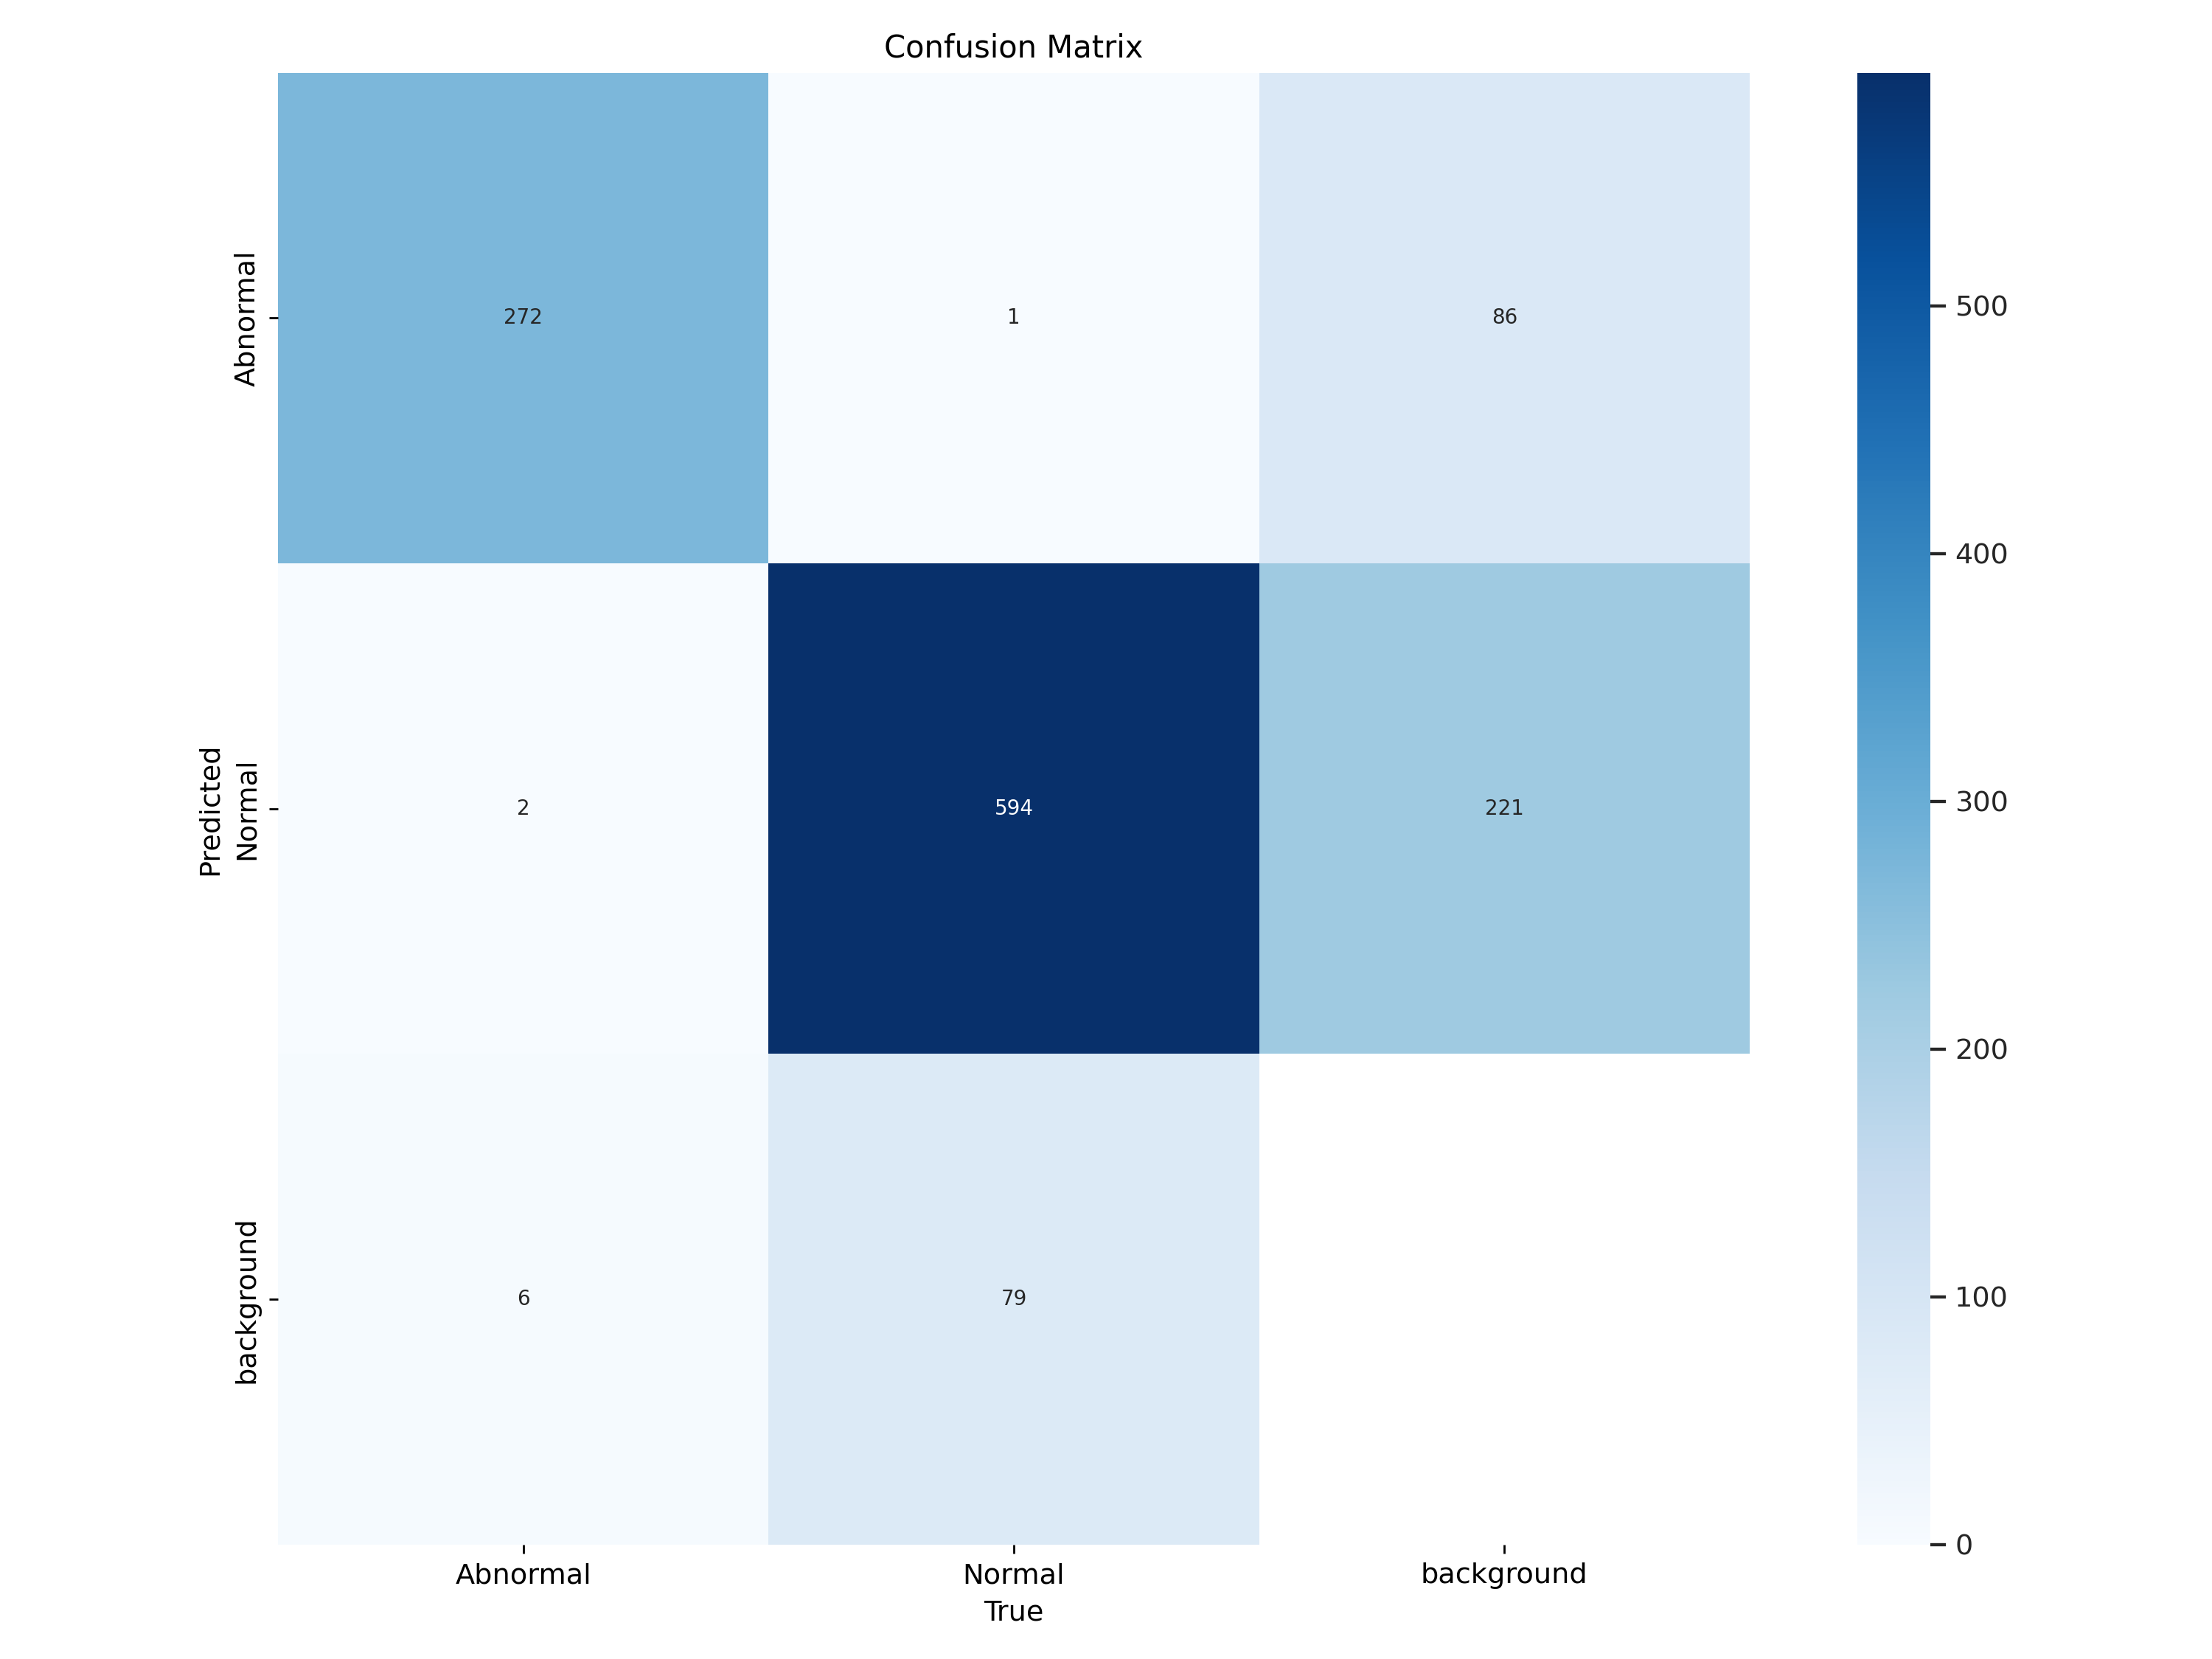

In [14]:

%cd {HOME}
Image(filename=f'{HOME}/runs/detect/train/confusion_matrix.png', width=600)


In [15]:

%cd {HOME}
!yolo task=detect mode=val model={HOME}/runs/detect/train/weights/best.pt data={dataset.location}/data.yaml

/content
Ultralytics YOLOv8.0.196 🚀 Python-3.10.12 torch-2.3.0+cu121 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 168 layers, 11126358 parameters, 0 gradients, 28.4 GFLOPs
val: Scanning /content/datasets/Chicken-Detection-3/valid/labels.cache... 104 images, 0 backgrounds, 0 corrupt: 100% 104/104 [00:00<?, ?it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100% 7/7 [00:10<00:00,  1.56s/it]
                   all        104        954        0.8      0.872      0.917      0.608
              Abnormal        104        280      0.831      0.934      0.947      0.636
                Normal        104        674      0.768       0.81      0.887       0.58
Speed: 4.3ms preprocess, 15.2ms inference, 0.0ms loss, 13.3ms postprocess per image
Results saved to runs/detect/val
💡 Learn more at https://docs.ultralytics.com/modes/val


In [17]:
%cd {HOME}
!yolo task=detect mode=predict model={HOME}/runs/detect/train/weights/best.pt conf=0.25 source={dataset.location}/test/images save=True


/content
Ultralytics YOLOv8.0.196 🚀 Python-3.10.12 torch-2.3.0+cu121 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 168 layers, 11126358 parameters, 0 gradients, 28.4 GFLOPs

image 1/53 /content/datasets/Chicken-Detection-3/test/images/0006_jpg.rf.c5d3954c4c1a3f7195acfba9cbce4549.jpg: 480x800 4 Abnormals, 10 Normals, 109.7ms
image 2/53 /content/datasets/Chicken-Detection-3/test/images/0012_jpg.rf.1f396e8b6d4630eda3ca263fa0fc2a2d.jpg: 480x800 5 Abnormals, 11 Normals, 15.6ms
image 3/53 /content/datasets/Chicken-Detection-3/test/images/0023_jpg.rf.012c4282946af70d9bd10be5589b3d7d.jpg: 480x800 4 Abnormals, 13 Normals, 15.6ms
image 4/53 /content/datasets/Chicken-Detection-3/test/images/0024_jpg.rf.8d6474d7a1eff0f10b686749c403dec0.jpg: 480x800 5 Abnormals, 12 Normals, 15.5ms
image 5/53 /content/datasets/Chicken-Detection-3/test/images/0027_jpg.rf.3c902bebfd455c12e83728281860c238.jpg: 480x800 4 Abnormals, 13 Normals, 15.5ms
image 6/53 /content/datasets/Chicken-Detection-3/test/images/0028

In [22]:

!yolo task=detect mode=predict model={HOME}/runs/detect/train/weights/best.pt conf=0.25 source=/content/test2.mp4

Ultralytics YOLOv8.0.196 🚀 Python-3.10.12 torch-2.3.0+cu121 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 168 layers, 11126358 parameters, 0 gradients, 28.4 GFLOPs

video 1/1 (1/234) /content/test2.mp4: 480x800 2 Abnormals, 3 Normals, 103.5ms
video 1/1 (2/234) /content/test2.mp4: 480x800 2 Abnormals, 2 Normals, 15.6ms
video 1/1 (3/234) /content/test2.mp4: 480x800 2 Abnormals, 1 Normal, 15.6ms
video 1/1 (4/234) /content/test2.mp4: 480x800 2 Abnormals, 1 Normal, 15.7ms
video 1/1 (5/234) /content/test2.mp4: 480x800 1 Abnormal, 2 Normals, 15.7ms
video 1/1 (6/234) /content/test2.mp4: 480x800 1 Abnormal, 3 Normals, 15.6ms
video 1/1 (7/234) /content/test2.mp4: 480x800 3 Normals, 15.6ms
video 1/1 (8/234) /content/test2.mp4: 480x800 3 Normals, 15.6ms
video 1/1 (9/234) /content/test2.mp4: 480x800 1 Abnormal, 2 Normals, 15.7ms
video 1/1 (10/234) /content/test2.mp4: 480x800 1 Abnormal, 2 Normals, 15.6ms
video 1/1 (11/234) /content/test2.mp4: 480x800 2 Normals, 15.6ms
video 1/1 (12/234) /conte